In [1]:
import pandas as pd

from starter_code import (
    ani1_config,
    load_ani1_data,
    calc_resid,
    create_heatmap,
    create_boxplot,
    filter_outliers,
    create_histogram,
    num_heavy_atoms
)

## Load ANI-1 Data

In [2]:
molecules = load_ani1_data()
# Calculate the residual vector for each method-method combination
resid = calc_resid(molecules)
# Resid but as a Dataframe
resid_df = calc_resid(molecules, as_dataframe=True)

data file path is ./ANI-1ccx_clean_fullentry.h5


Calculating residuals: 100%|██████████| 91/91 [00:25<00:00,  3.56it/s]


In [3]:
# Filtering Data
filtered_data = filter_outliers(data_matrix=resid)

# Linear Least Squares

### MAE Heatmaps

Here we plot the MAE between quantum chemical methods in a heatmap.

In [ ]:
# Create a heatmap of the MAE between methods
create_heatmap(
    ani1_config["target"], "MAE between methods", data_matrix=resid, show_progress=True
)
# Heatmap with filtered data
create_heatmap(
    ani1_config["target"],
    "MAE between methods but filtered",
    data_matrix=filtered_data,
    show_progress=True,
)

### Boxplots

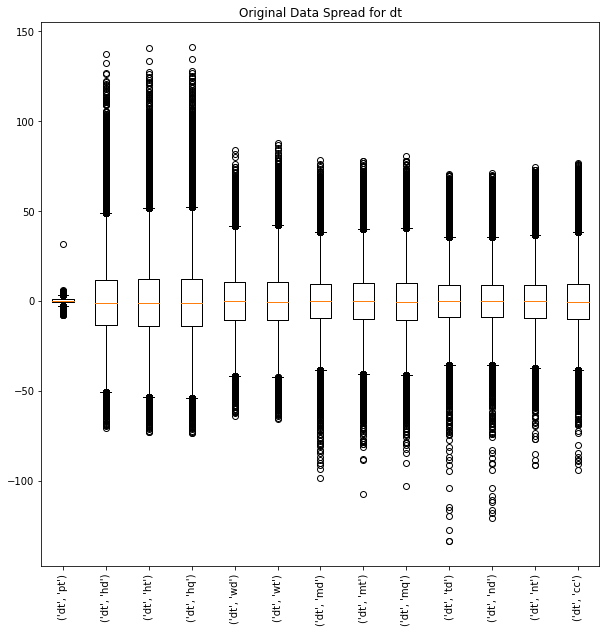

In [97]:
# Original data boxplot
create_boxplot(resid, "Original Data Spread", "dt")

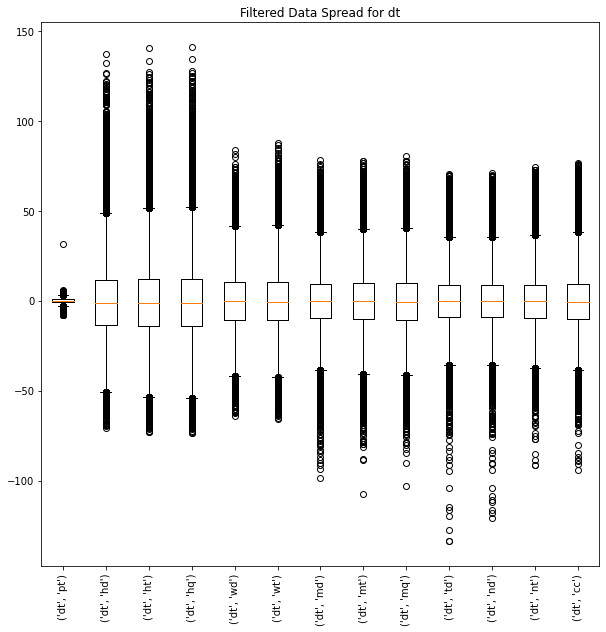

In [4]:
# Filtered data boxplot
create_boxplot(filtered_data, "Filtered Data Spread", "dt")

### Heatmap of number of outliers

100%|██████████| 91/91 [00:00<00:00, 21560.28it/s]


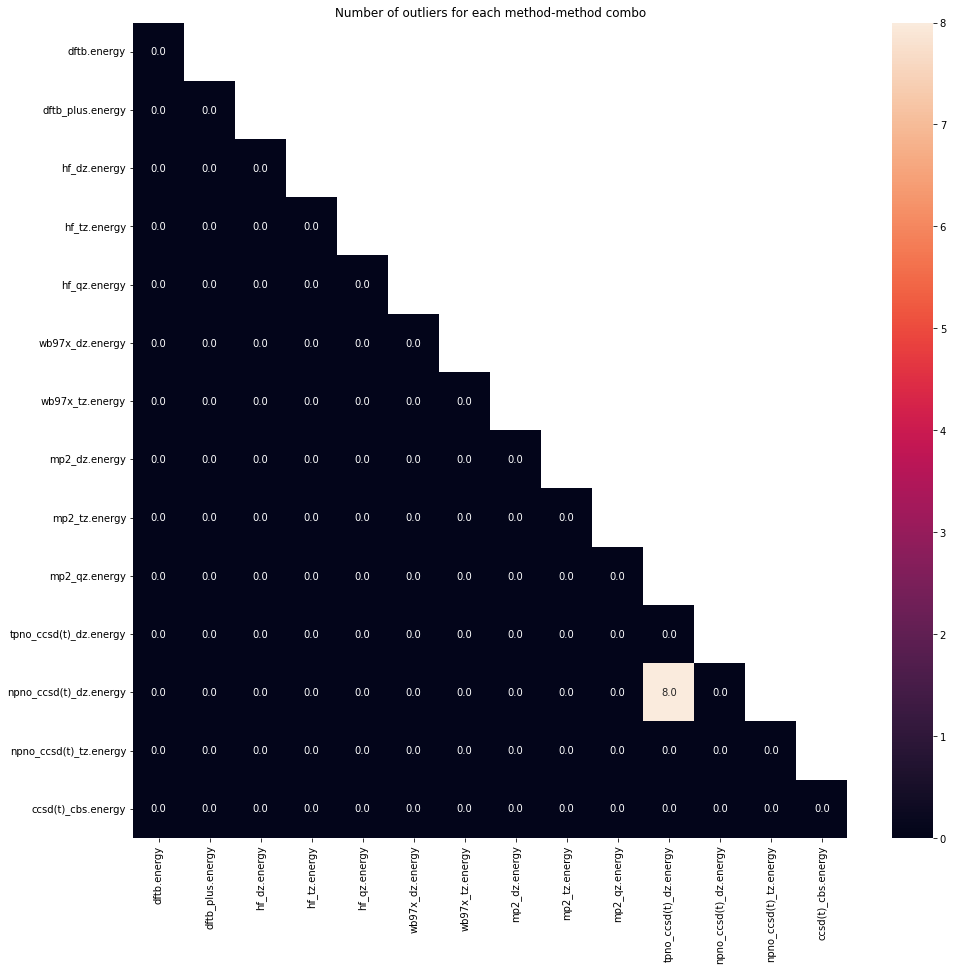

In [5]:
# Get number of outliers
n_outliers = {}
for (target_1, target_2) in resid:
    n_outliers[target_1, target_2] = len(resid[target_1, target_2]) - len(filtered_data[target_1, target_2])
# Plot
create_heatmap(
    ani1_config["target"],
    "Number of outliers for each method-method combo",
    data_matrix=n_outliers,
    show_progress=True
)
# okay to use create_heatmap since mean of 1 number is just the number

# Histograms for Outlier Molecule Frequency
In this section, we're interested to see if there are particular molecules that tend to be outliers more frequently than others.

To do this, we generate a histogram of the frequency at which a molecule appears as an outlier for a method-method pair.

In [19]:
data = filter_outliers(dataframe=resid_df).groupby(level=[0]).sum()
for index in data.index:
    nh = num_heavy_atoms(index)
    data.loc[str(index)] = data.loc[str(index)] / (nh ** .5)

print(data)
# Optionally order the molecules by the mean of the outlier count for each method-method pair
data = data.loc[data.mean(axis="columns").sort_values(ascending=False).index, :]

            (dt, cc)    (dt, hd)    (dt, hq)    (dt, ht)    (dt, md)  \
name                                                                   
C1H1N1     21.213203   21.213203   21.213203   21.213203   21.213203   
C1H1N1O1   15.011107   15.011107   15.011107   15.011107   15.011107   
C1H1N3O1  178.885438  178.885438  178.885438  178.885438  178.885438   
C1H1N3O2  287.406796  287.406796  287.406796  287.406796  287.406796   
C1H1N3O3   83.152184   83.152184   83.152184   83.152184   83.152184   
...              ...         ...         ...         ...         ...   
H6O3       75.055535   75.055535   75.055535   75.055535   75.055535   
H8O4       78.500000   78.500000   78.500000   78.500000   78.500000   
N2        103.237590  103.237590  103.237590  103.237590  103.237590   
N2O1       21.361960   21.361960   21.361960   21.361960   21.361960   
O3         34.641016   34.641016   34.641016   34.641016   34.641016   

            (dt, mq)    (dt, mt)    (dt, nd)    (dt, nt)    (dt

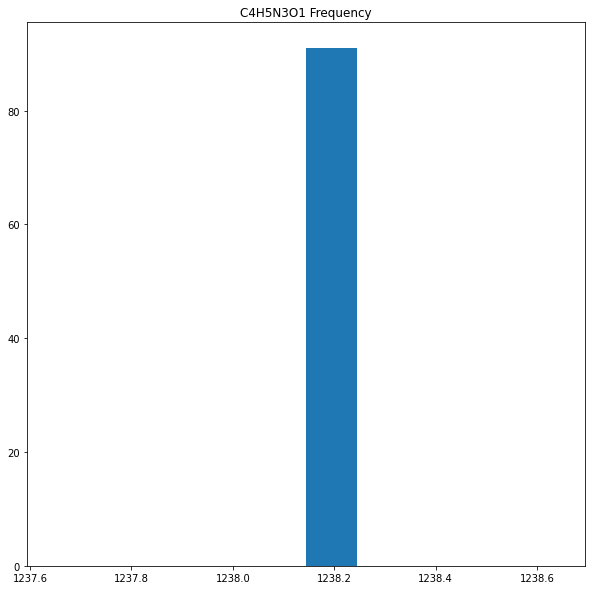

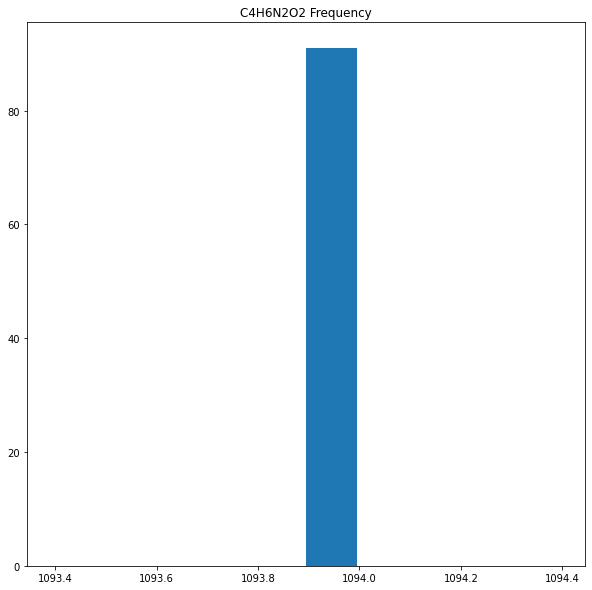

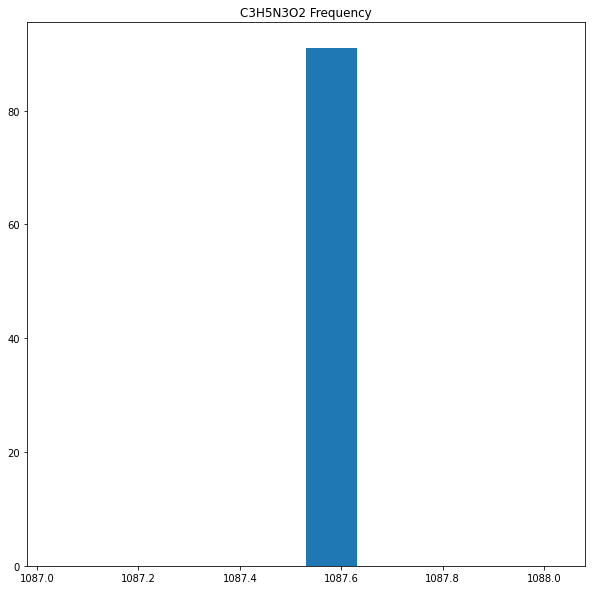

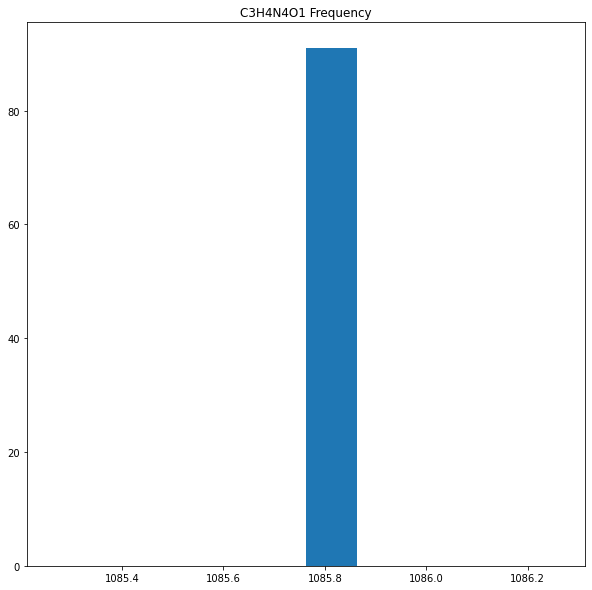

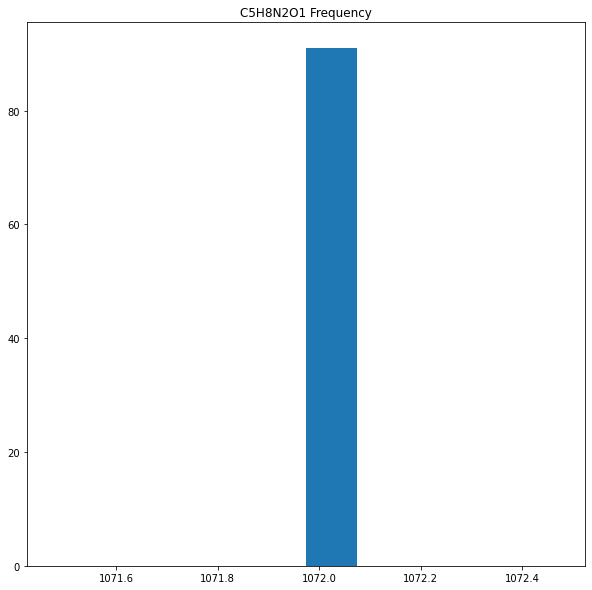

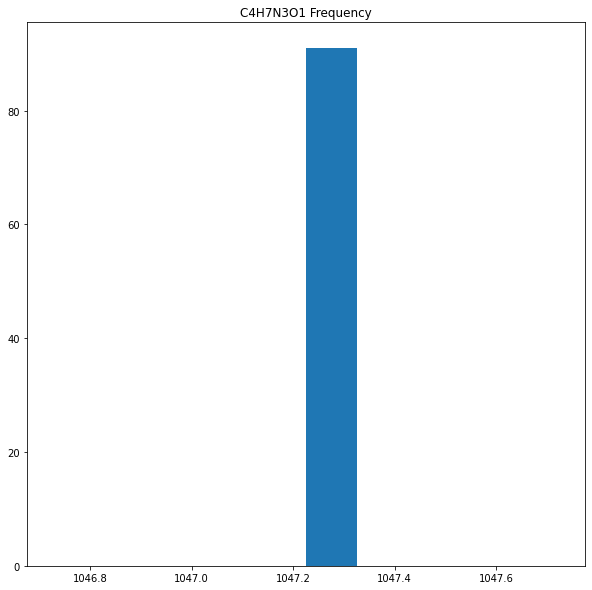

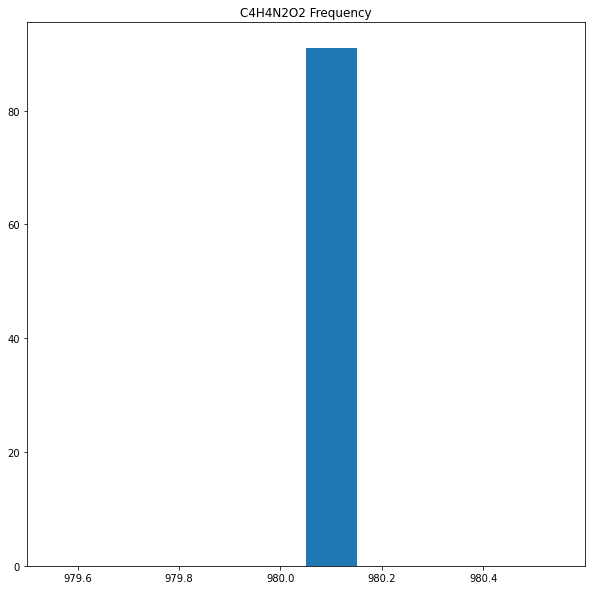

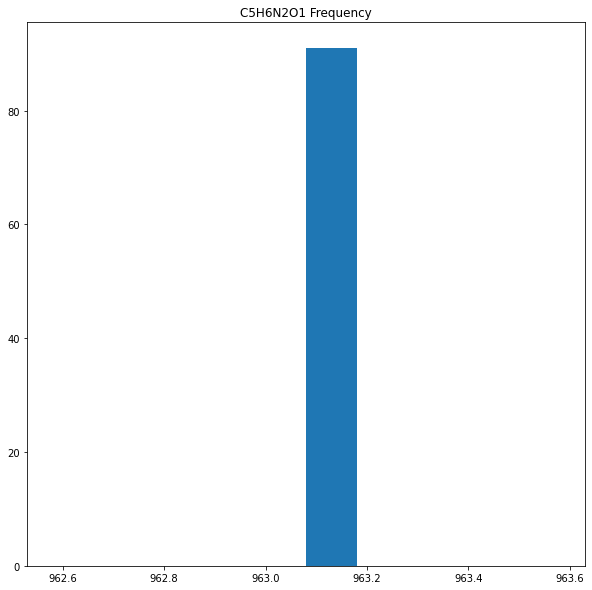

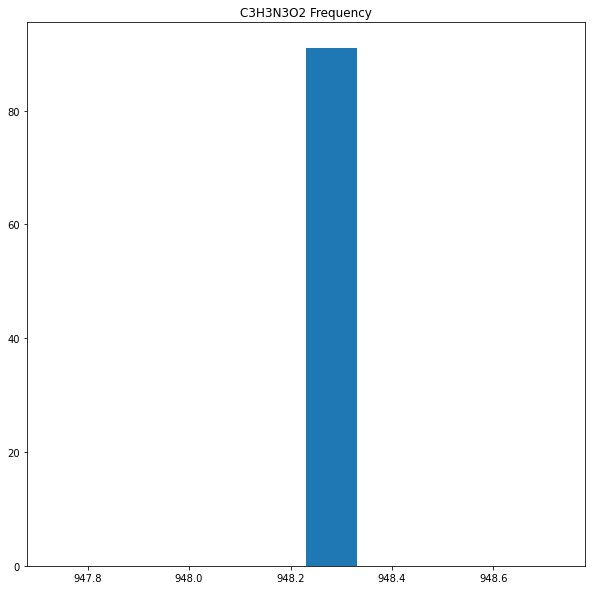

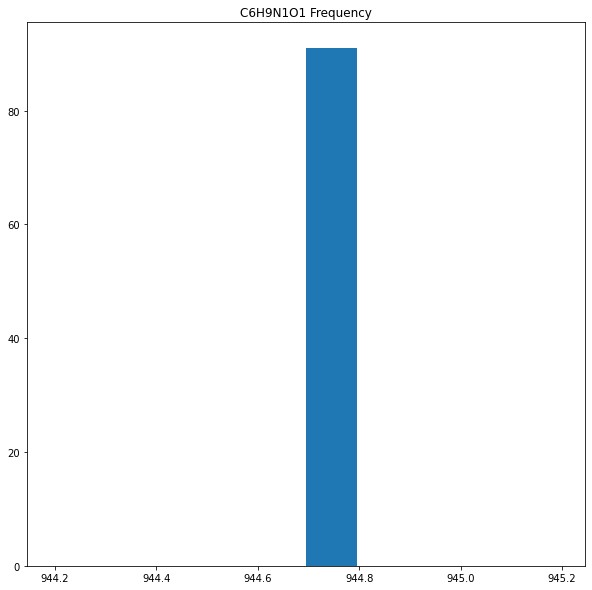

In [20]:
create_histogram(data.iloc[0:10])

In [ ]:
create_histogram(data.iloc[-10:-1])

Plot histograms of the percentage of molecular configurations which are outliers

In [21]:
data = filter_outliers(dataframe=resid_df).groupby(level=[0]).mean()

# Optionally order the molecules by the mean of the outlier proportion for each method-method pair
data = data.loc[data.mean(axis="columns").sort_values(ascending=False).index, :]

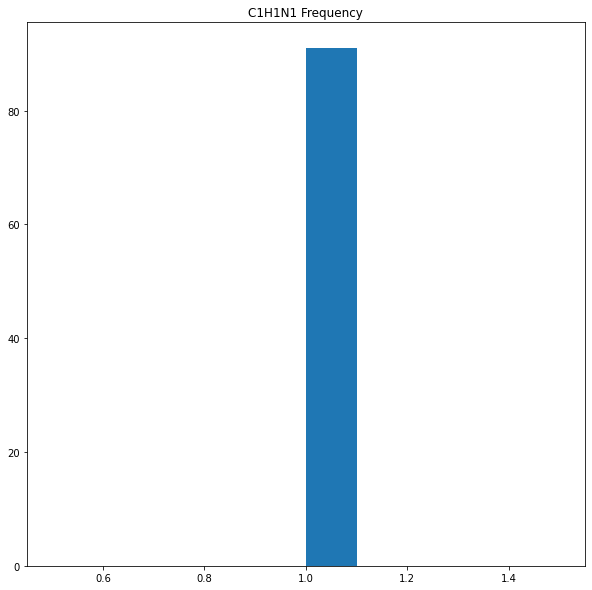

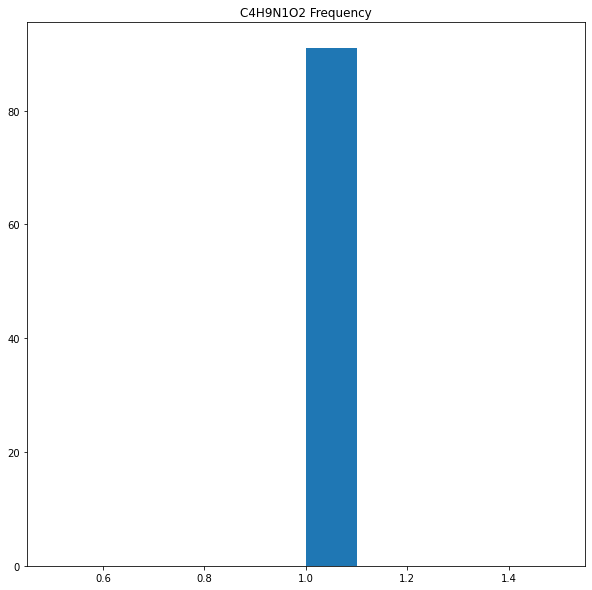

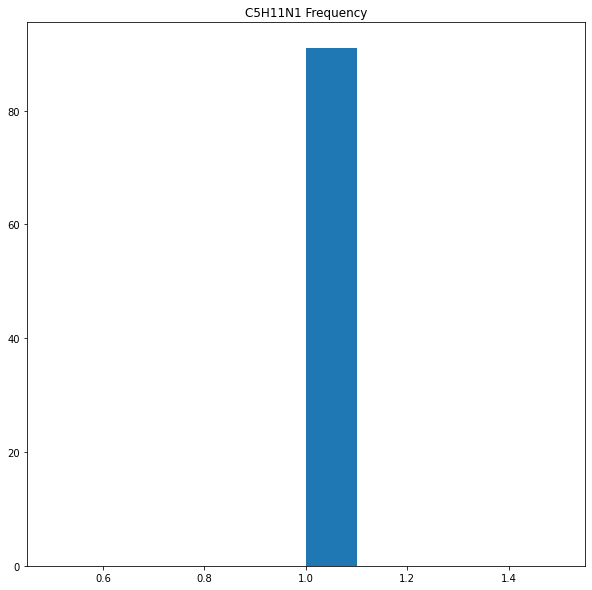

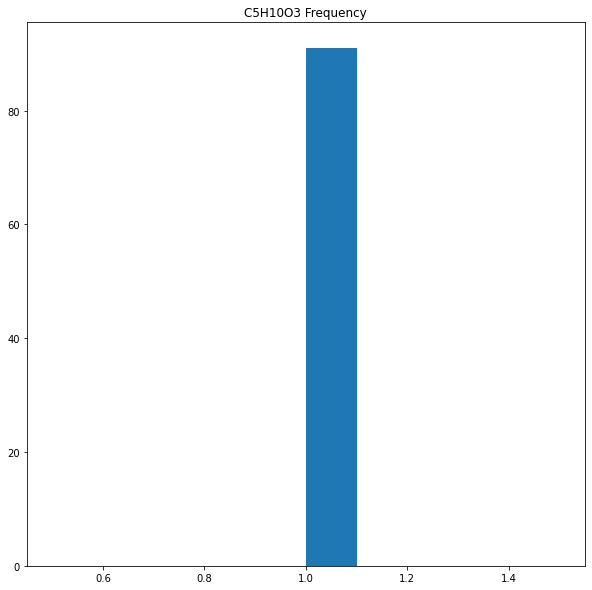

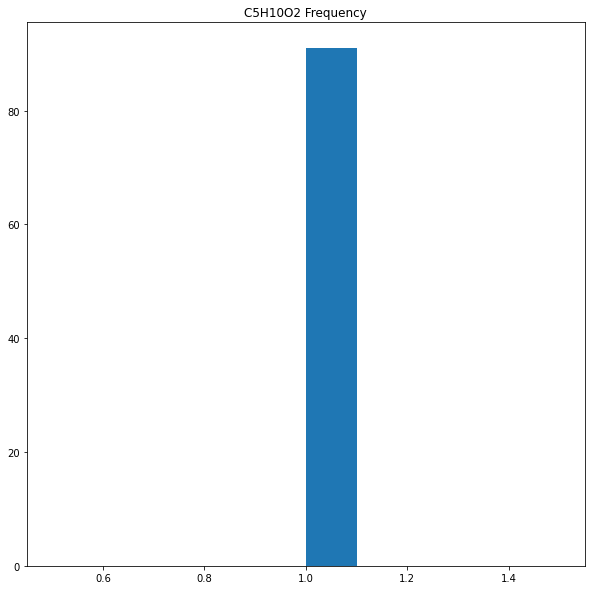

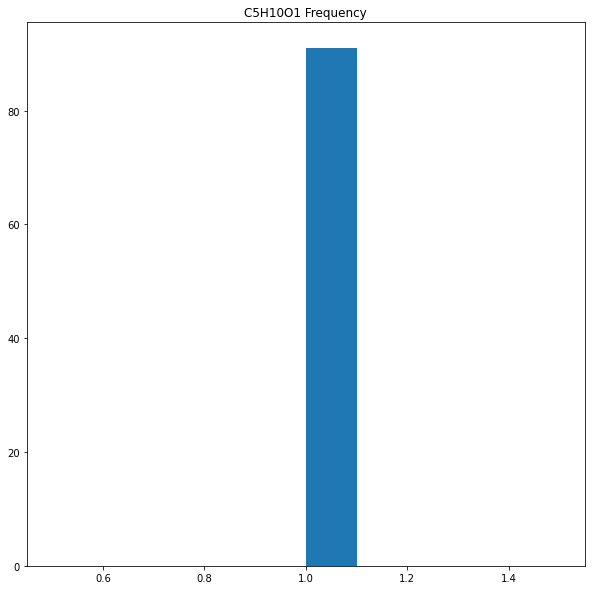

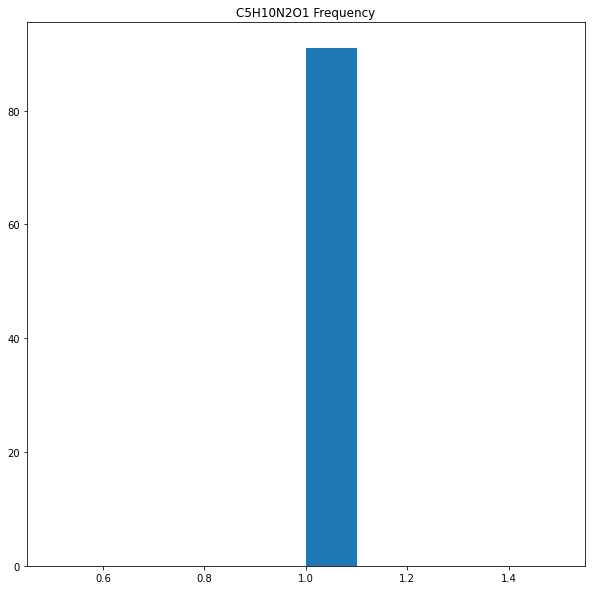

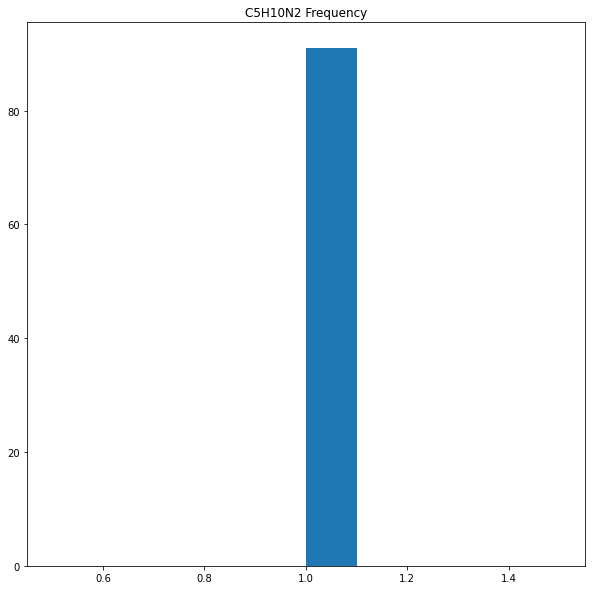

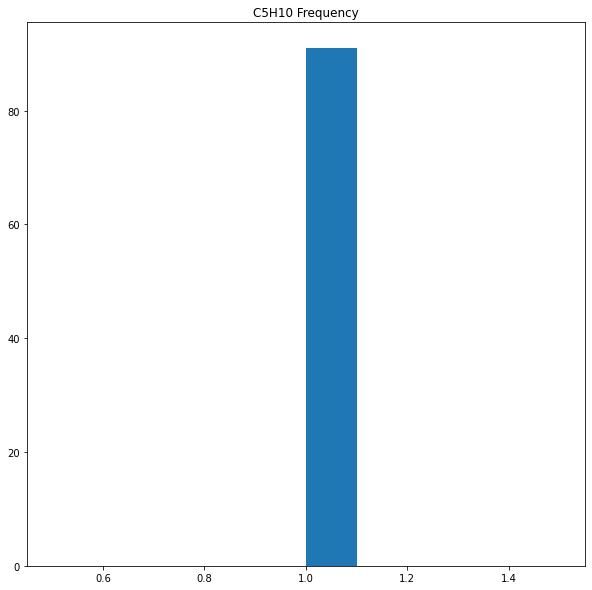

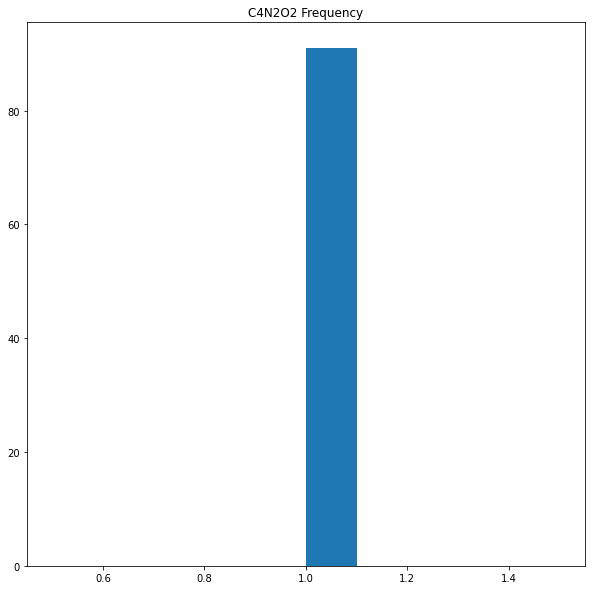

In [22]:
create_histogram(data.iloc[0:10])

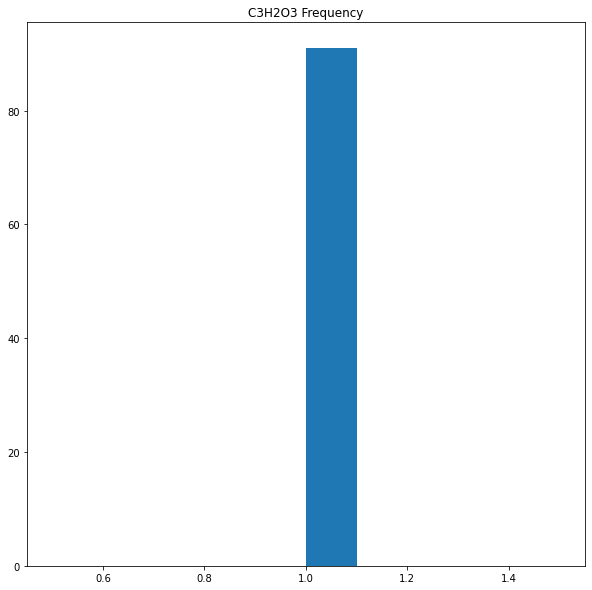

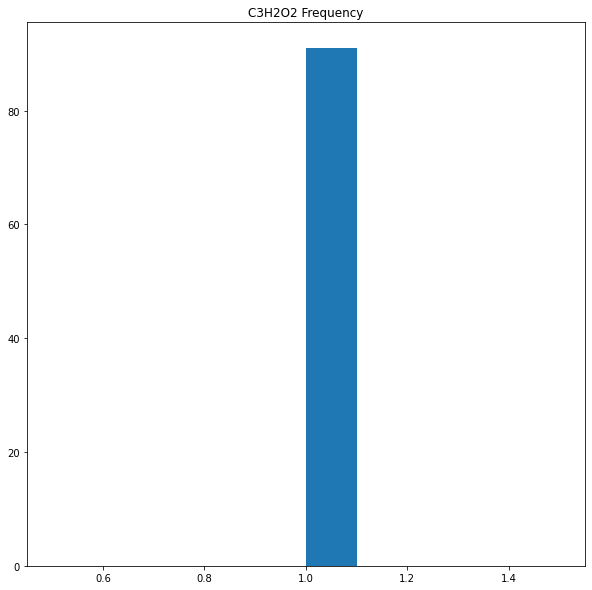

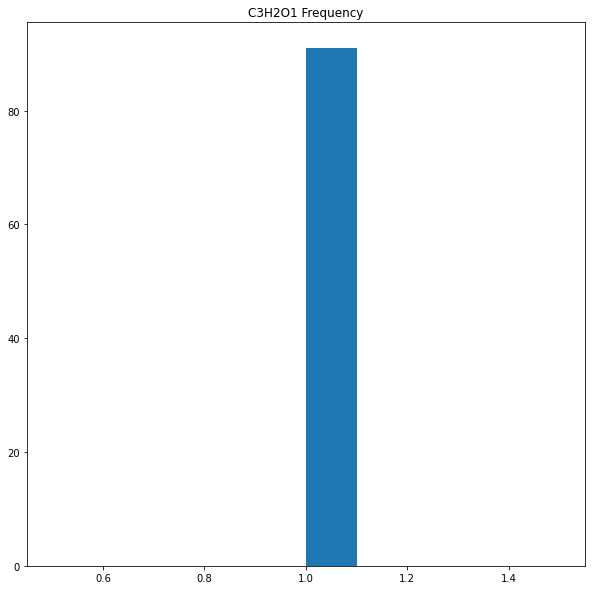

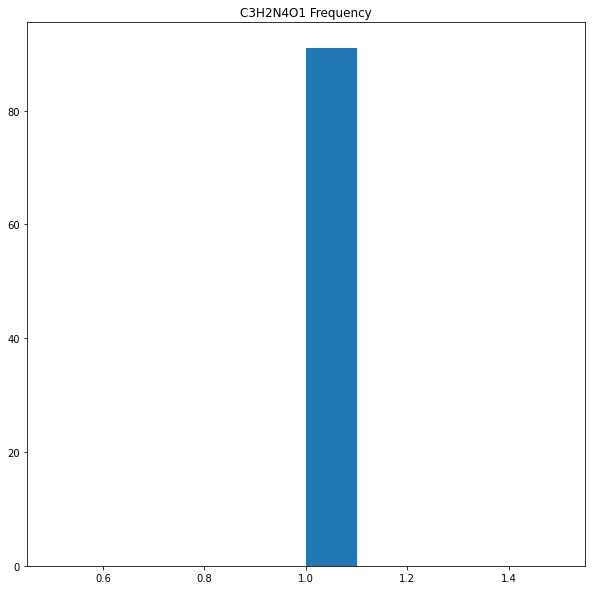

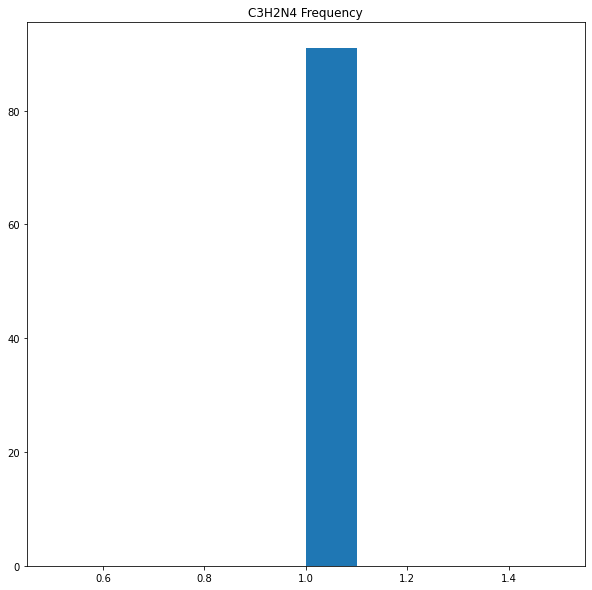

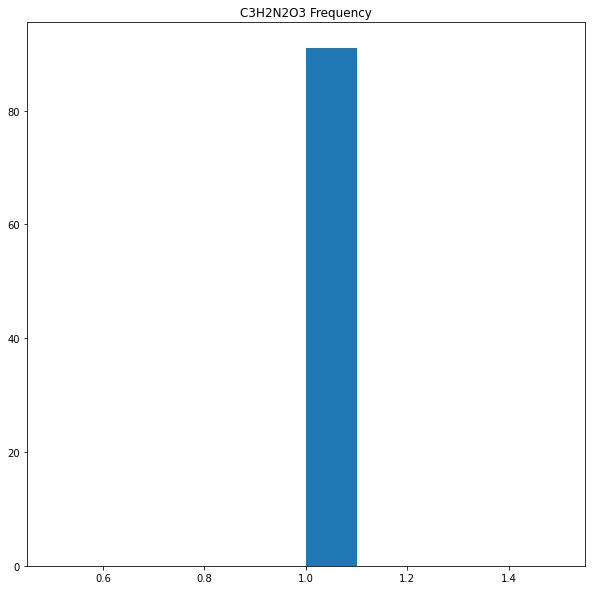

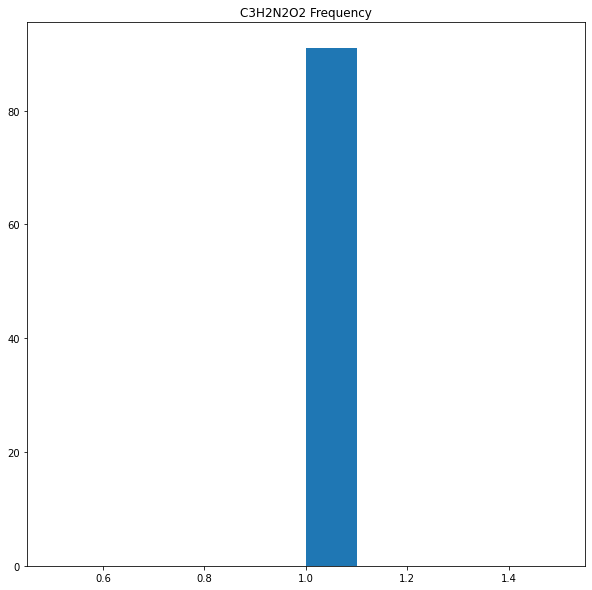

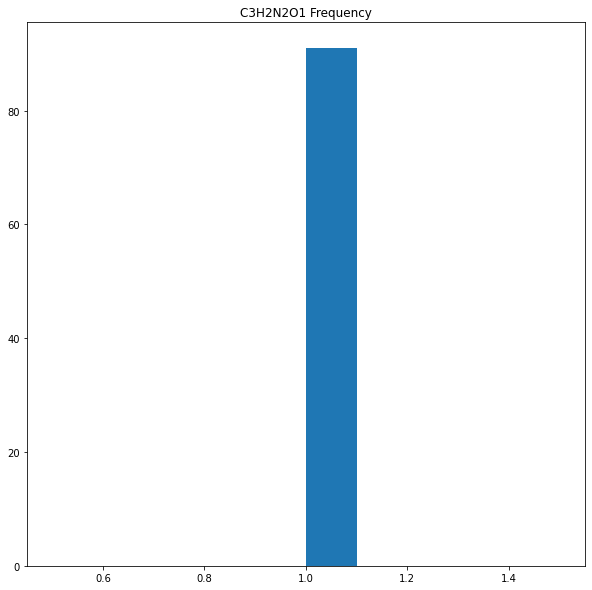

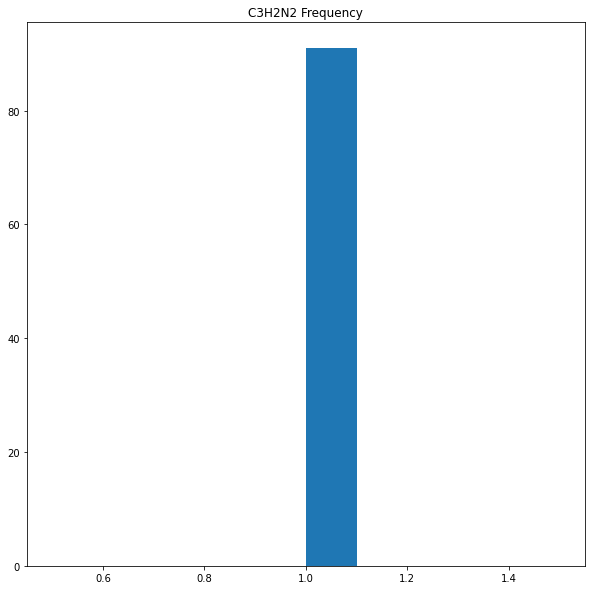

In [23]:
create_histogram(data.iloc[-10:-1])